In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open ('SMSSpamCollection')]

In [4]:
print (len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no, message in enumerate (messages[:10]):
    print (mess_no,message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['lenght']= messages['message'].apply(len)

In [12]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


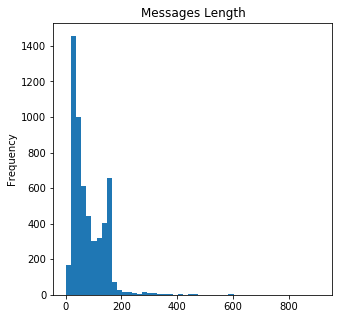

In [13]:
plt.figure(figsize=(5,5))
messages['lenght'].plot.hist(bins=50)
plt.title('Messages Length')
plt.ylabel=('Lenght of messages')

In [14]:
messages['lenght'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [15]:
pd.options.display.max_rows=None
pd.set_option('display.width', None)
messages[messages['lenght']==910]

,label,message,lenght
1085,ham,For me the love should start with attraction.i...,910


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020070437D08>,
      dtype=object)

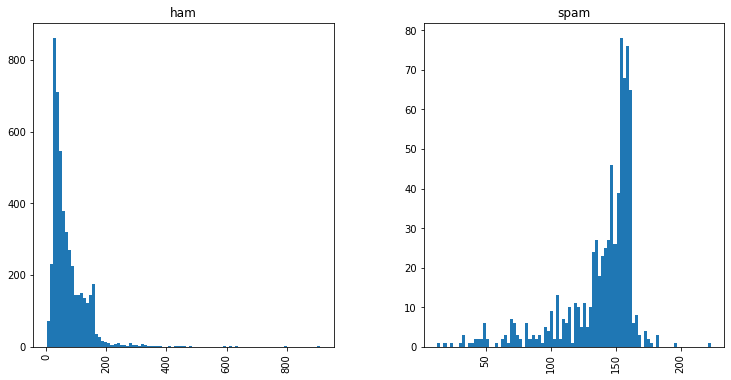

In [16]:
messages.hist(column='lenght',by='label',figsize=(12,6),bins=90)

In [17]:
import string

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from nltk.corpus import stopwords

In [61]:
#stopwords.words('English') anjie is the module for the yoruba version 

In [14]:
def text_preprocess(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]

In [1]:
messages.head(12)

NameError: name 'messages' is not defined

In [67]:
messages['message'].head(2).apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]
1    [Ok, lar, Joking, wif, u, oni]                                                                     
Name: message, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
bow_transformer= CountVectorizer(analyzer=text_preprocess).fit(messages['message'])

In [72]:
    print(len(bow_transformer.vocabulary_))

11425


In [73]:
#0123<==4
messg4=messages['message'][3]

In [74]:
messg4

'U dun say so early hor... U c already then say...'

In [75]:
bow4=bow_transformer.transform([messg4])

In [78]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [87]:
bow_transformer.get_feature_names()[9554]

'say'

In [88]:
bow_message= bow_transformer.transform(messages['message'])

In [89]:
print('Shape of sparse matrix:', bow_message.shape)

Shape of sparse matrix: (5572, 11425)


In [91]:
bow_message.nnz

50548

In [96]:
sparsity = (100 * bow_message.nnz/(bow_message.shape[0]*bow_message.shape[1]))

print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

In [98]:
tfidf_transformer= TfidfTransformer().fit(bow_message)

In [99]:
tfidf4=tfidf_transformer.transform(bow4)

In [100]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [101]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [102]:
messages_tfidf=tfidf_transformer.transform(bow_message)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [105]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [108]:
messages['label'][3]

'ham'

In [109]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
msg_train,msg_test,label_train,label_test= train_test_split(messages['message'],messages['label'],test_size=0.5)

In [21]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_preprocess)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

#pipeline is messy||use other machine learning models

In [57]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x000001B592A769D8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
 predictions=pipeline.predict(msg_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      2412
        spam       1.00      0.63      0.77       374

    accuracy                           0.95      2786
   macro avg       0.97      0.82      0.87      2786
weighted avg       0.95      0.95      0.95      2786



In [81]:
new_test=['peter is a fool']

In [82]:
pipeline.predict(new_test)

array(['spam'], dtype='<U4')